# CARGA Y EXPLORACIÓN DE DATOS

En este notebook se realiza una exploración preliminar del conjunto de datos train.csv proporcionado para la competencia udea-ai4eng-20242. El objetivo principal es familiarizarnos con la estructura de los datos, revisar su calidad y realizar algunas visualizaciones que nos permitan identificar patrones iniciales. Se analizan variables como el programa académico, el estrato socioeconómico, el acceso a internet, entre otras, buscando comprender mejor los posibles factores asociados al rendimiento estudiantil.

## Preparación del entorno y descarga de archivos

Descargamos script auxiliar y ejecutamos configuración

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

Configuramos el acceso a Kaggle con el archivo kaggle.json que debe estar almacenado en esta misma carpeta

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 kaggle.json

Descarga del dataset de la competencia

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


Descomprimimos los archivos descargados

In [ ]:
!unzip -o udea*.zip > /dev/null

Revisamos un resumen del contenido

In [ ]:
!wc -l *.csv

  296787 submission_example.csv
  296787 test.csv
  692501 train.csv
 1286075 total


## Cargar los datos y observar su estructura

In [ ]:
import pandas as pd
import numpy as np

Cargamos el archivo de entrenamiento

In [ ]:
df = pd.read_csv("train.csv")

Verificamos las dimensiones del dataset

In [ ]:
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (692500, 21)


Vista rápida a los primeros registros

In [ ]:
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Análisis exploratorio inicial

¿Cuántos estudiantes hay por nivel de rendimiento?

<Axes: title={'center': 'Distribución de rendimiento global'}, xlabel='RENDIMIENTO_GLOBAL'>

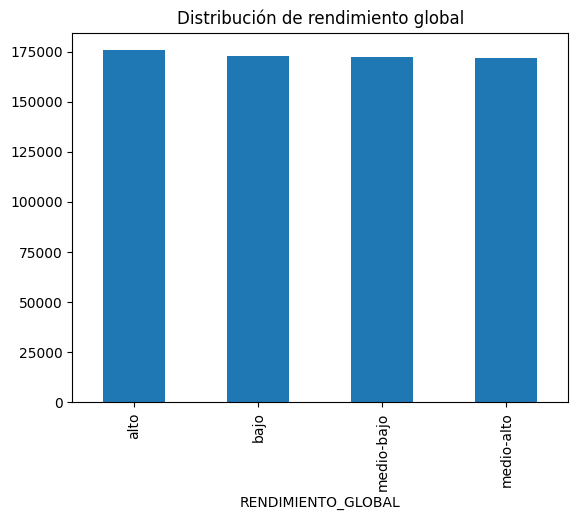

In [ ]:
df['RENDIMIENTO_GLOBAL'].value_counts().plot(kind='bar', title="Distribución de rendimiento global")

¿De qué departamentos provienen los estudiantes?

<Axes: title={'center': 'Top 10 Departamentos de origen'}, xlabel='ESTU_PRGM_DEPARTAMENTO'>

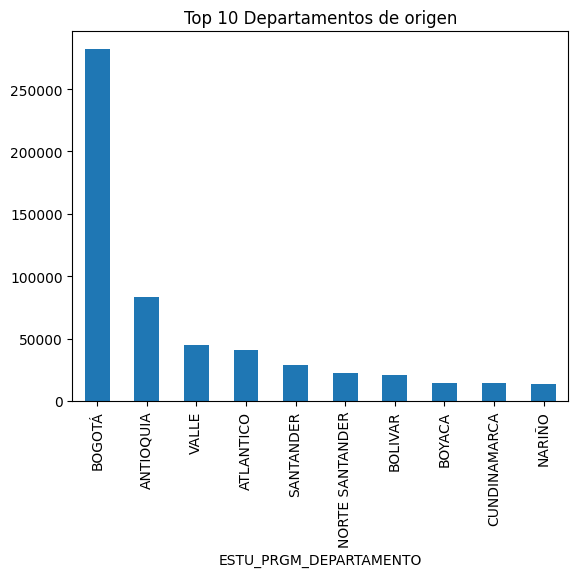

In [ ]:
df['ESTU_PRGM_DEPARTAMENTO'].value_counts().head(10).plot(kind='bar', title="Top 10 Departamentos de origen")

Exploración por programa académico

<Axes: title={'center': 'Top 10 Programas Académicos'}, ylabel='ESTU_PRGM_ACADEMICO'>

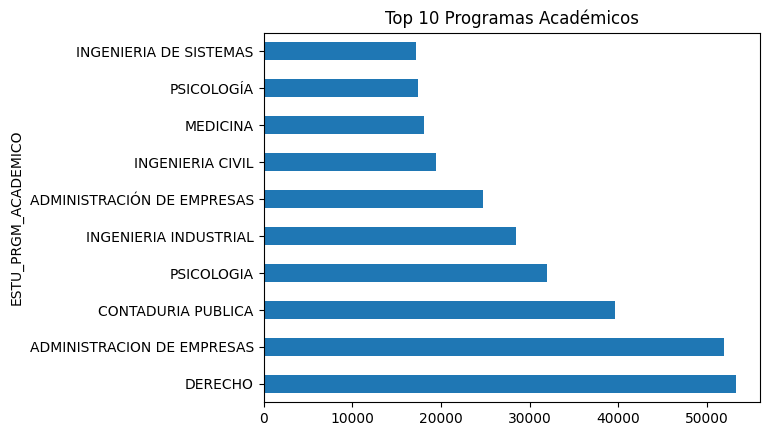

In [ ]:
df['ESTU_PRGM_ACADEMICO'].value_counts().head(10).plot(kind='barh', title="Top 10 Programas Académicos")

## Análisis focalizado en dos columnas

Seleccionamos dos columnas de interés para comenzar análisis más detallado

In [ ]:
df_sub = df[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
df_sub.head()

,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo


Visualizamos la distribución de la educación de la madre

<Axes: title={'center': 'Nivel educativo de la madre'}, xlabel='FAMI_EDUCACIONMADRE'>

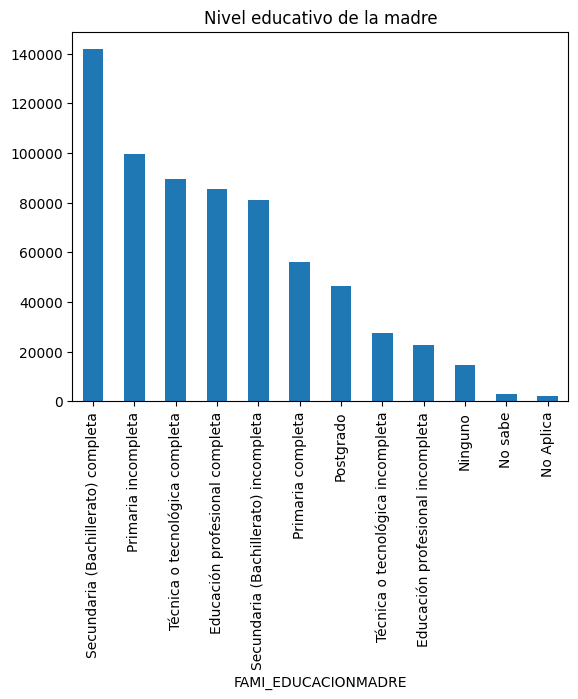

In [ ]:
df_sub['FAMI_EDUCACIONMADRE'].value_counts().plot(kind='bar', title="Nivel educativo de la madre")

Distribución de rangos de valor de matrícula

<Axes: title={'center': 'Valor de matrícula universitaria'}, xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

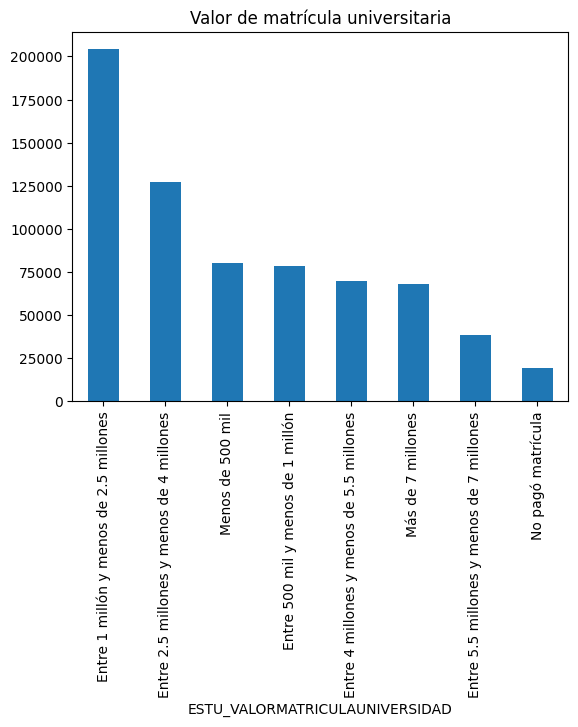

In [ ]:
df_sub['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().plot(kind='bar', title="Valor de matrícula universitaria")

## Exploración cruzada entre características y rendimiento

In [ ]:
import matplotlib.pyplot as plt
from rlxutils import subplots

Exploramos cómo varía el rendimiento según valor de matrícula

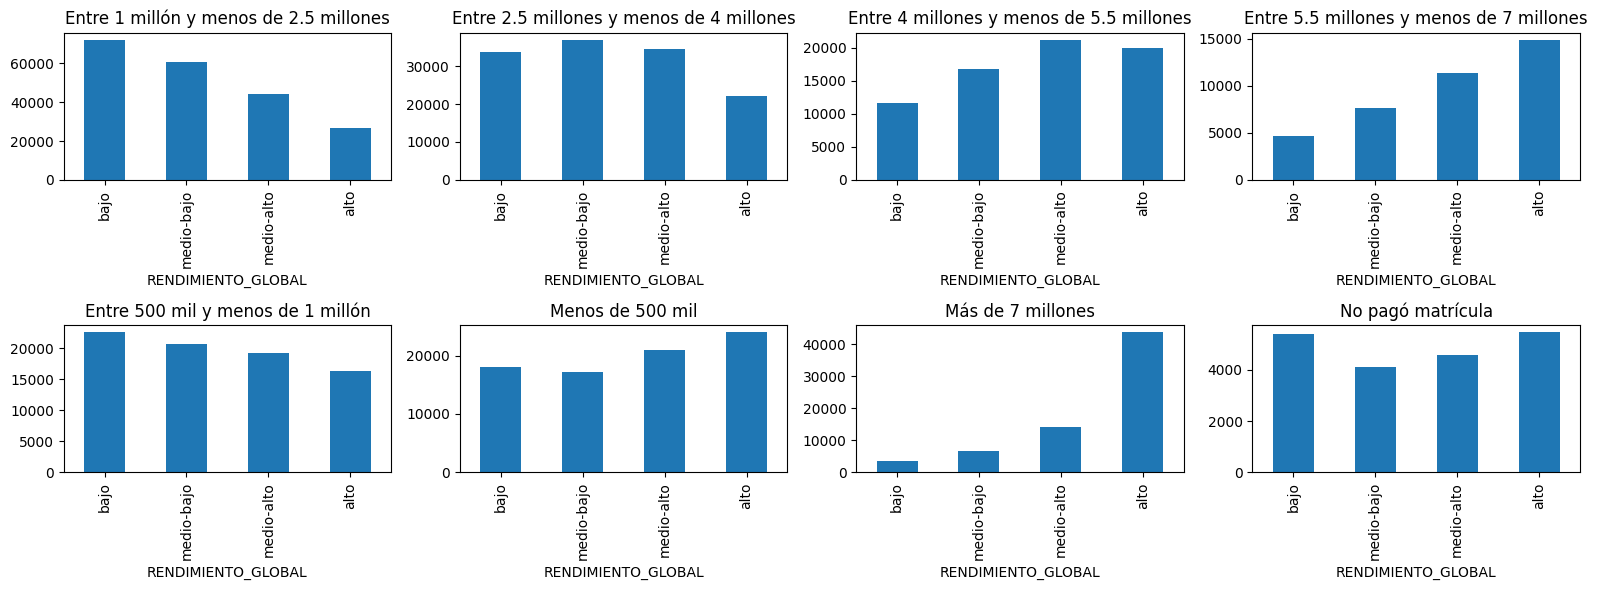

In [ ]:
categorias_matricula = sorted(df_sub['ESTU_VALORMATRICULAUNIVERSIDAD'].dropna().unique())

for ax, cat in subplots(categorias_matricula, n_cols=4, usizex=4):
    subset = df_sub[df_sub['ESTU_VALORMATRICULAUNIVERSIDAD'] == cat]
    subset['RENDIMIENTO_GLOBAL'].value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', ax=ax)
    ax.set_title(cat)

Exploramos cómo varía el rendimiento según educación de la madre

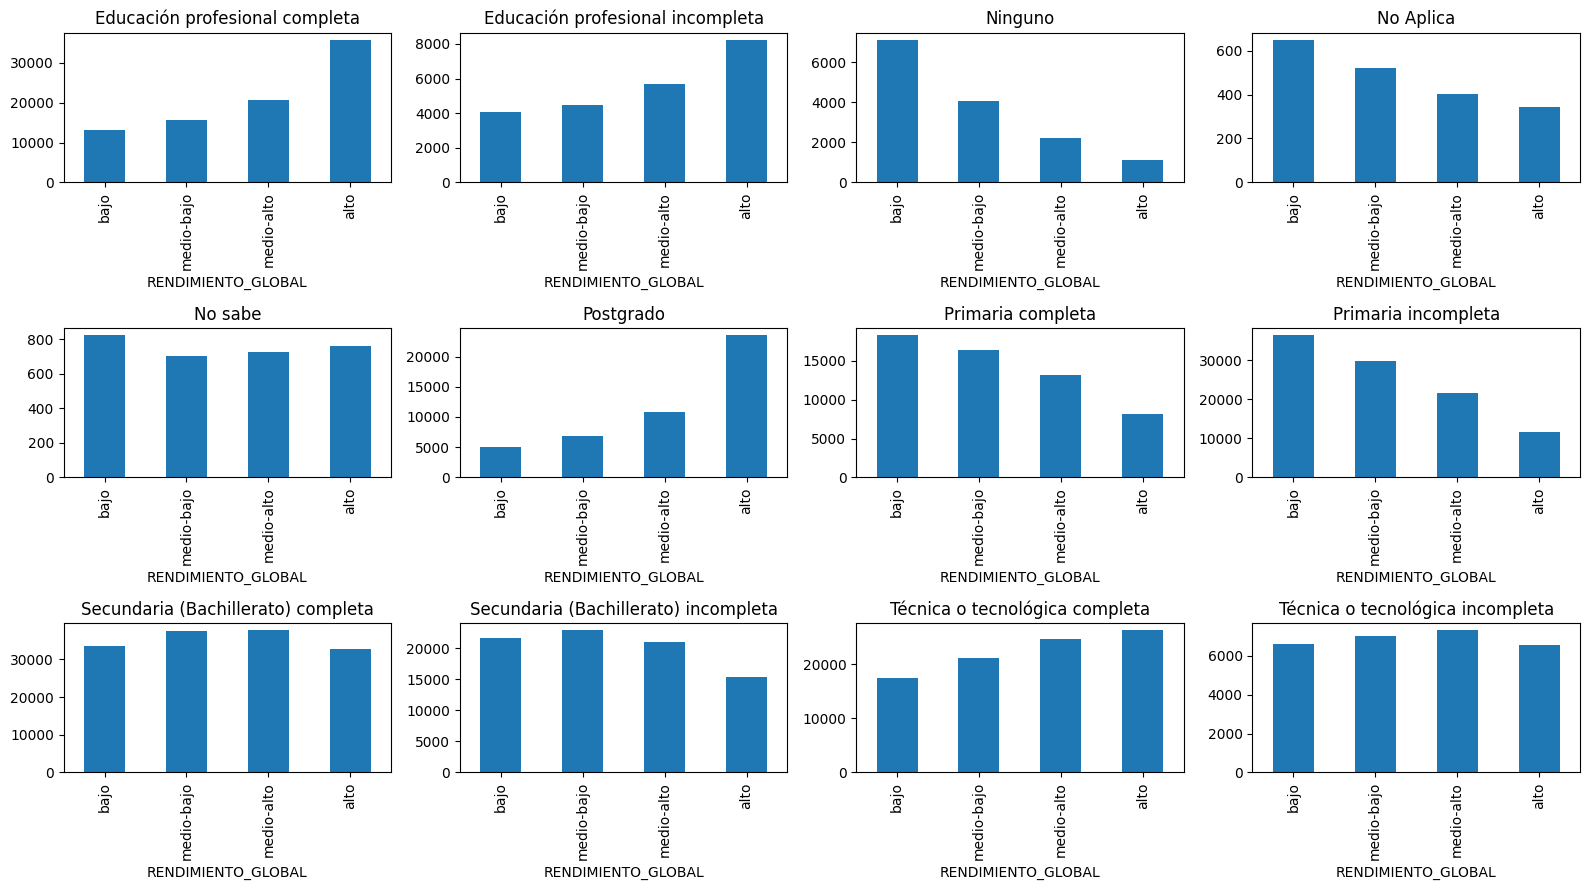

In [ ]:
categorias_madre = sorted(df_sub['FAMI_EDUCACIONMADRE'].dropna().unique())

for ax, cat in subplots(categorias_madre, n_cols=4, usizex=4):
    subset = df_sub[df_sub['FAMI_EDUCACIONMADRE'] == cat]
    subset['RENDIMIENTO_GLOBAL'].value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', ax=ax)
    ax.set_title(cat)

## Otras distribuciones en la exploración

Distribución por estrato socioeconómico

<Axes: title={'center': 'Distribución por estrato de vivienda'}, xlabel='FAMI_ESTRATOVIVIENDA'>

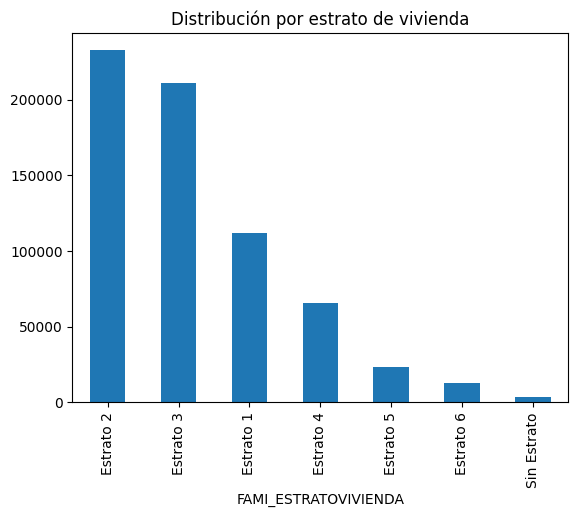

In [ ]:
df['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar', title='Distribución por estrato de vivienda')

Número de estudiantes por rango de horas de trabajo para visualizar si trabajar muchas horas afecta el rendimiento

<Axes: title={'center': 'Horas de trabajo semanal'}, xlabel='ESTU_HORASSEMANATRABAJA'>

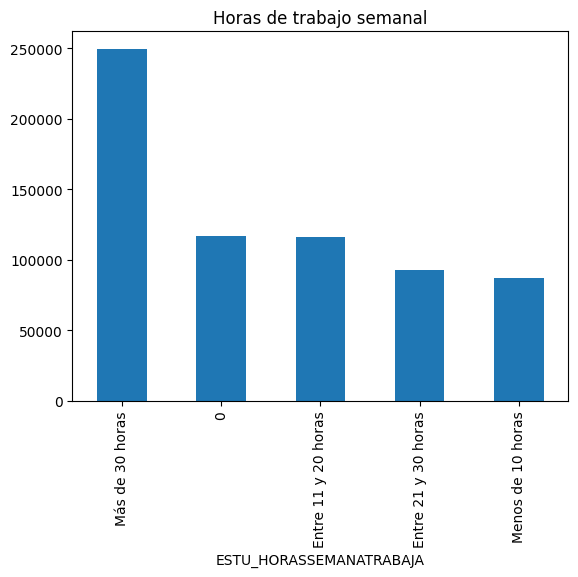

In [ ]:
df['ESTU_HORASSEMANATRABAJA'].value_counts().plot(kind='bar', title='Horas de trabajo semanal')

Distribución cruzada: Horas de trabajo vs. Rendimiento

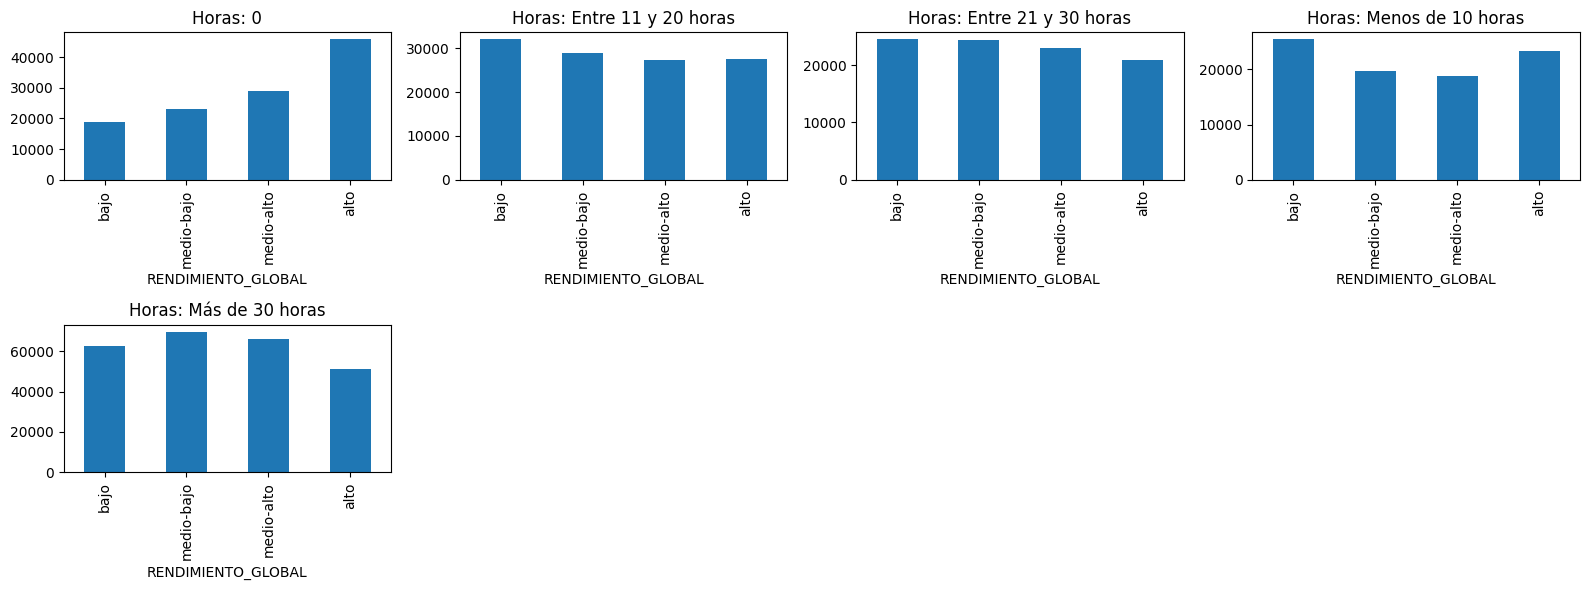

In [ ]:
horas = sorted(df['ESTU_HORASSEMANATRABAJA'].dropna().unique())

for ax, h in subplots(horas, n_cols=4, usizex=4):
    subset = df[df['ESTU_HORASSEMANATRABAJA'] == h]
    subset['RENDIMIENTO_GLOBAL'].value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', ax=ax)
    ax.set_title(f'Horas: {h}')

 ¿Tener internet en casa hace la diferencia?

<Axes: title={'center': 'Rendimiento por acceso a Internet'}, xlabel='FAMI_TIENEINTERNET'>

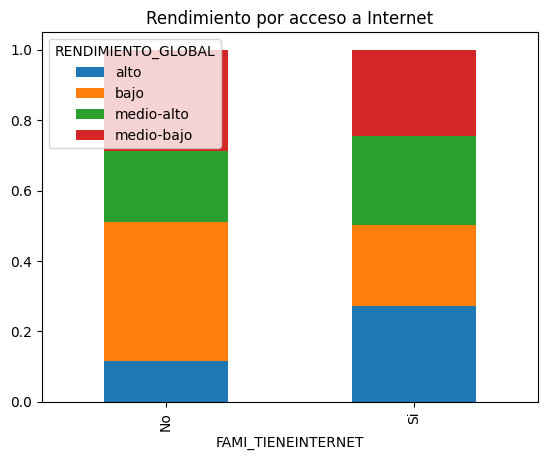

In [ ]:
df.groupby('FAMI_TIENEINTERNET')['RENDIMIENTO_GLOBAL'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title='Rendimiento por acceso a Internet')

Distribución cruzada entre tipo de pago de matrícula y rendimiento

<Axes: title={'center': 'Rendimiento por forma de pago de matrícula'}, xlabel='ESTU_PAGOMATRICULAPROPIO'>

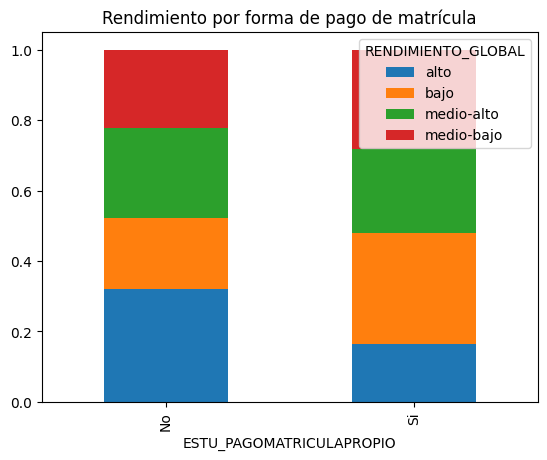

In [ ]:
df.groupby('ESTU_PAGOMATRICULAPROPIO')['RENDIMIENTO_GLOBAL'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title='Rendimiento por forma de pago de matrícula')